In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
from google.colab import files
uploaded = files.upload()
print(uploaded)

Saving student_grades.csv to student_grades (1).csv
{'student_grades (1).csv': b'Assignment_Score,Attendance,Final_Grade\r\n60,65,58\r\n70,70,68\r\n75,80,72\r\n80,85,78\r\n85,90,84\r\n90,95,91\r\n50,60,52\r\n65,75,66\r\n78,82,76\r\n88,92,89\r\n'}


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl

filename = list(uploaded.keys())[0]

df = pd.read_csv(filename)
df.head()

,Assignment_Score,Attendance,Final_Grade
0,60,65,58
1,70,70,68
2,75,80,72
3,80,85,78
4,85,90,84


In [16]:
# Check missing values
print(df.isnull().sum())

# Feature matrix (X) and target variable (y)
X = df[["Assignment_Score", "Attendance"]].values
y = df["Final_Grade"].values

print("Features:\n", X)
print("Target:\n", y)

Assignment_Score    0
Attendance          0
Final_Grade         0
dtype: int64
Features:
 [[60 65]
 [70 70]
 [75 80]
 [80 85]
 [85 90]
 [90 95]
 [50 60]
 [65 75]
 [78 82]
 [88 92]]
Target:
 [58 68 72 78 84 91 52 66 76 89]


In [17]:
# 80% training, 20% testing
split_index = int(0.8 * len(df))

X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

print("Training Data Size:", len(X_train))
print("Testing Data Size:", len(X_test))

Training Data Size: 8
Testing Data Size: 2


In [18]:
# Add column of ones for intercept
X_train_bias = np.c_[np.ones(X_train.shape[0]), X_train]
X_test_bias = np.c_[np.ones(X_test.shape[0]), X_test]

In [19]:
theta = np.linalg.inv(X_train_bias.T.dot(X_train_bias)).dot(X_train_bias.T).dot(y_train)

print("Intercept:", theta[0])
print("Assignment Coefficient:", theta[1])
print("Attendance Coefficient:", theta[2])

Intercept: -3.8275109170274604
Assignment Coefficient: 0.5912663755457737
Attendance Coefficient: 0.41877729257642016


In [20]:
y_pred = X_test_bias.dot(theta)

print("Predicted Grades:", y_pred)
print("Actual Grades:", y_test)

Predicted Grades: [76.63100437 86.73144105]
Actual Grades: [76 89]


In [21]:
mse = np.mean((y_test - y_pred)**2)
print("Mean Squared Error:", mse)

Mean Squared Error: 2.772263114744921


In [22]:
ss_total = np.sum((y_test - np.mean(y_test))**2)
ss_residual = np.sum((y_test - y_pred)**2)

r2 = 1 - (ss_residual / ss_total)

print("R² Score:", r2)

R² Score: 0.9343843049764515


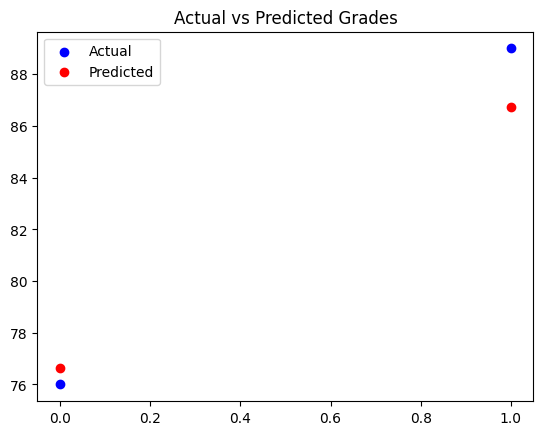

In [23]:
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted')
plt.legend()
plt.title("Actual vs Predicted Grades")
plt.show()

In [24]:
# New student data
new_student = np.array([[1, 85, 90]])  # [bias, assignment, attendance]

predicted_grade = new_student.dot(theta)

print("Predicted Final Grade:", predicted_grade[0])

Predicted Final Grade: 84.12008733624111
